# Chapter 5: Intro to Machine Learning with Scikit-learn
# By: Parisa Hormozzadeh
This notebook introduces basic concepts of machine learning and shows a simple example using scikit-learn.

---

## Typical Machine Learning Workflow
1. Load data
2. Preprocess data (clean, encode, scale)
3. Split data into training and testing sets
4. Choose and train model
5. Evaluate model
6. Make predictions

---

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Sample dataset
data = {
    'Voltage': [220, 230, 210, 225, 240, 215, 235, 205],
    'Current': [10, 15, 9, 12, 14, 11, 13, 8],
    'Status': ['Normal', 'High', 'Low', 'Normal', 'High', 'Low', 'High', 'Low']
}
df = pd.DataFrame(data)
print("Dataset:")
df

Dataset:


,Voltage,Current,Status
0,220,10,Normal
1,230,15,High
2,210,9,Low
3,225,12,Normal
4,240,14,High
5,215,11,Low
6,235,13,High
7,205,8,Low


## 1. Preparing Features and Target
We want to predict the 'Status' based on 'Voltage' and 'Current'.

Encode 'Status' labels to integers for the classifier.

In [5]:
from sklearn.preprocessing import LabelEncoder

X = df[['Voltage', 'Current']]
le = LabelEncoder()
y = le.fit_transform(df['Status'])


In [6]:
X

,Voltage,Current
0,220,10
1,230,15
2,210,9
3,225,12
4,240,14
5,215,11
6,235,13
7,205,8


In [8]:
y

array([2, 0, 1, 2, 0, 1, 0, 1])

## 2. Splitting Data into Training and Testing Sets
Use 75% of data for training and 25% for testing.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (6, 2)
Testing set size: (2, 2)


In [10]:
X_train

,Voltage,Current
0,220,10
7,205,8
2,210,9
4,240,14
3,225,12
6,235,13


In [11]:
X_test

,Voltage,Current
1,230,15
5,215,11


## 3. Training a Decision Tree Classifier
Fit the model on training data.

In [15]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 4. Evaluating the Model
Predict on test data and compute accuracy and confusion matrix.

In [17]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1])

In [18]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 1]]


## 5. Making Predictions on Test Data
Try predicting status for new voltage and current readings.

In [19]:
new_samples = pd.DataFrame({
    'Voltage': [225, 210],
    'Current': [13, 9]
})
predictions = clf.predict(new_samples)
predicted_labels = le.inverse_transform(predictions)
print("Predicted status for new samples:")
print(predicted_labels)

Predicted status for new samples:
['High' 'Low']


---
## Move on to Real-world data
---

## 1. Import the dataset



In [2]:
import pandas as pd
data = pd.read_csv('power_consumption.csv')
data

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerDemandCategory
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low
...,...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,High
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,Low
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,Low
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,Low


# 2. Check for missing values

In [3]:
data.isnull().sum()

Datetime                     0
Temperature               2096
Humidity                     0
WindSpeed                   50
GeneralDiffuseFlows          0
DiffuseFlows                 0
PowerConsumption_Zone1       0
PowerConsumption_Zone2       0
PowerConsumption_Zone3       0
PowerDemandCategory          0
dtype: int64

# 3. Split into Features and Target

In [4]:
data_set = data.drop ('Datetime' , axis=1)
X = data_set.drop('PowerDemandCategory' , axis=1)
y = data_set['PowerDemandCategory']

In [5]:
X

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [6]:
y

0         Low
1         Low
2         Low
3         Low
4         Low
         ... 
52411    High
52412     Low
52413     Low
52414     Low
52415     Low
Name: PowerDemandCategory, Length: 52416, dtype: object

In [45]:
missing_values = data_set.isnull().sum()
print(missing_values)

Temperature               2096
Humidity                     0
WindSpeed                   50
GeneralDiffuseFlows          0
DiffuseFlows                 0
PowerConsumption_Zone1       0
PowerConsumption_Zone2       0
PowerConsumption_Zone3       0
PowerDemandCategory          0
dtype: int64


In [46]:
y

0         Low
1         Low
2         Low
3         Low
4         Low
         ... 
52411    High
52412     Low
52413     Low
52414     Low
52415     Low
Name: PowerDemandCategory, Length: 52416, dtype: object

# 4. Split into train and test sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [11]:
X_train

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
13733,14.26,75.80,0.069,24.910,22.400,30033.84284,17725.05092,15447.27273
7696,16.71,56.34,0.084,588.000,604.900,35402.03390,18700.30395,14848.64322
29395,24.76,51.82,4.906,0.113,0.115,29935.41528,20122.78481,26281.50628
51081,16.15,69.36,0.074,44.750,53.080,39586.31179,32844.43081,15062.66507
12629,24.28,46.98,4.916,436.100,469.800,33469.27660,18120.73171,15601.93548
...,...,...,...,...,...,...,...,...
41463,18.79,82.20,0.074,0.099,0.107,36916.93654,22328.21577,15832.70517
4247,17.10,64.99,4.914,343.000,319.900,34967.08861,20841.33739,16383.61446
43787,16.91,56.67,0.084,0.051,0.137,23556.92308,18702.89256,10646.74699
42652,17.50,81.60,4.914,0.044,0.163,25359.12473,16158.92116,10901.39818


# 5. Handle missing values using only the training set

In [48]:
# Compute statistics from ****training data ONLY*****
mean_temp = X_train['Temperature'].mean()
median_wind = X_train['WindSpeed'].median()

# Fill missing values in training set
X_train['Temperature'] = X_train['Temperature'].fillna(mean_temp)
X_train['WindSpeed'] = X_train['WindSpeed'].fillna(median_wind)

# Use the same values to fill the test set
X_test['Temperature'] = X_test['Temperature'].fillna(mean_temp)
X_test['WindSpeed'] = X_test['WindSpeed'].fillna(median_wind)

print(X_train.isnull().sum())
print(X_test.isnull().sum())

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


# 6. Training

## 6.1. Train a Decision Tree model

In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 6.2. Visualize the Decision Tree

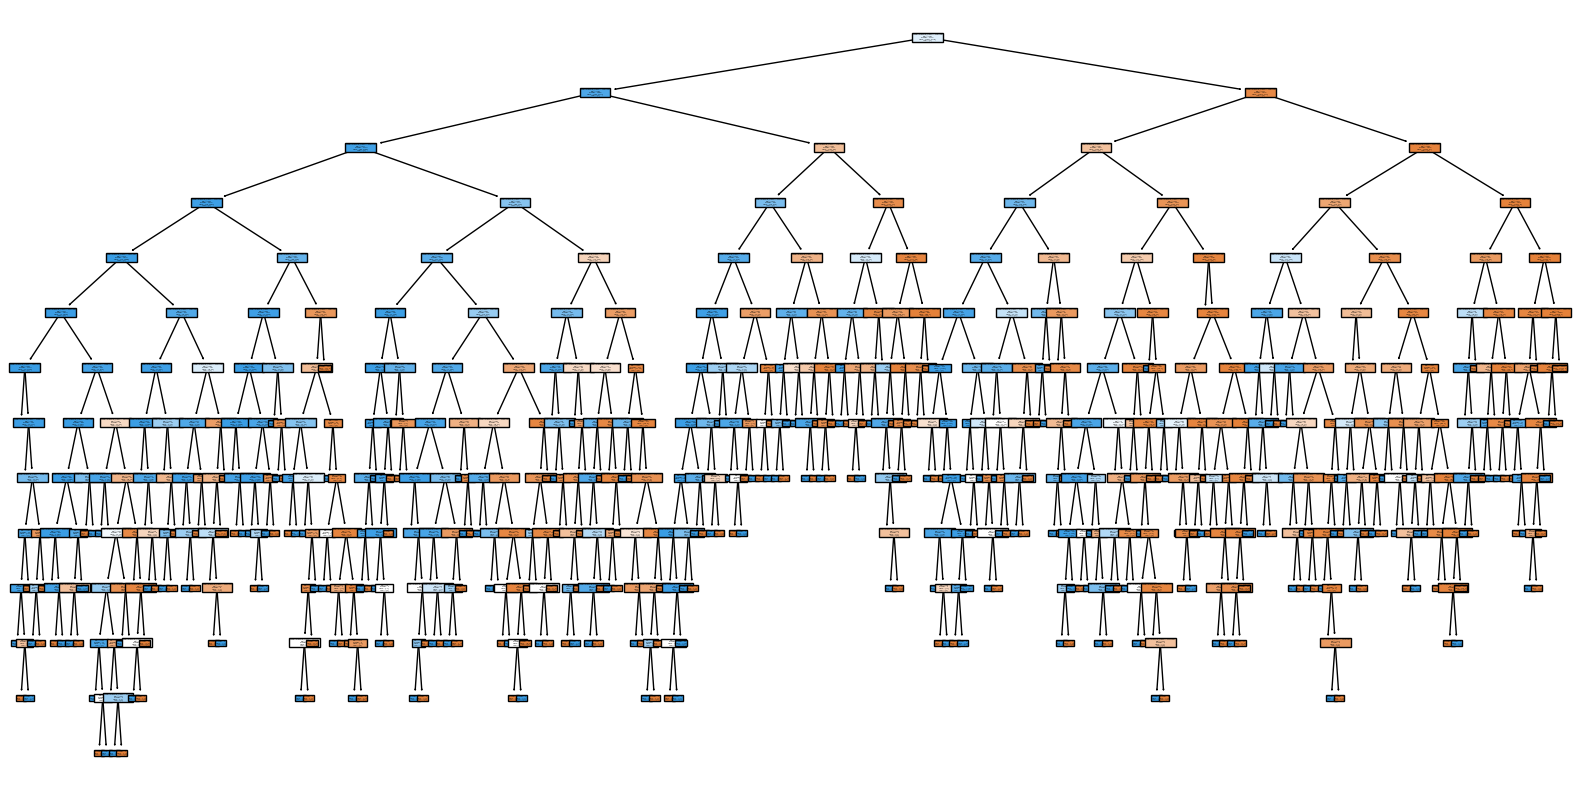

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, class_names=True, filled=True)
plt.show()


# 7. Evaluate the model

In [50]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9892216711178939


## Summary
- Machine learning lets computers learn patterns from data.
- Scikit-learn is a simple, powerful ML library in Python.
- Typical ML workflow involves preparing data, training, and evaluating models.
- Decision Trees are easy-to-understand classifiers.
- Next steps: explore other models, cross-validation, and hyperparameter tuning.